# Generating an n-gram network of the complete (canonical) human proteome

For this analysis a complete set of the human proteome is being imported and all domain architectures will undergo n-gram analysis. The proteome is limited to only the canonical forms of genes.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import ngramUtilities
import matplotlib.pyplot as plt
from os import listdir
import networkAnalysisUtilities
from matplotlib import cm,colors


In [2]:
import generateCompleteProteome
generateCompleteProteome.generate_adjacency_json('Current_Adjacency.json', adj_dir='./')

Generating a new Adjacency Matrix but not a csv file.


In [2]:
# Load the adjacencty matrix of the proteome
import generateCompleteProteome
adj_tst = generateCompleteProteome.import_adjacency('Current_Complete_Proteome_Adjacency.csv', adj_dir='./')
removed_ngrams = generateCompleteProteome.import_removed_ngrams('Current_Complete_Proteome_Removed_Ngrams.csv',rm_dir='./')
ref_df, interpro_dict = generateCompleteProteome.import_proteome_files()

In [3]:
import generateCompleteProteome
adj_tst = generateCompleteProteome.import_adjacency_from_json('Current_Adjacency.json', adj_dir='./')
removed_ngrams = generateCompleteProteome.import_removed_ngrams('Current_Complete_Proteome_Removed_Ngrams.csv',rm_dir='./')
ref_df, interpro_dict = generateCompleteProteome.import_proteome_files()

In [4]:
_,full_ngram_dict = ngramUtilities.get_ngrams_from_df(ref_df,[k for k in interpro_dict.keys()],66)
temp_rm = set(full_ngram_dict.keys()).difference(adj_tst.columns.tolist())
rm_overlap_check = temp_rm.difference(removed_ngrams)

In [5]:
adj_comp, _,_,rm_check, _ =ngramUtilities.full_ngram_analysis(ref_df,[k for k in interpro_dict],readable_flag=0, concat_flag=False, max_ngram = 66, max_node_len=66)

KeyboardInterrupt: 

In [ ]:
# Testing the information gain functions

import entropyCalc

In [ ]:
# Number of n-gram models:
k = 15

# Getting all the IDs so that all n-grams can be extracted and ensuring the reference dataframe is untouched for the analysis
all_IDs = [x for x in interpro_dict.keys()]
orig_ref = ref_df.copy()
ngram_models = {}
ngram_check = {}

# Running through each n-gram model
for n in range(1,k+1):
    model_details = {}
    ngram_adj_df, new_ref, _, rm_ngrams,_ = ngramUtilities.full_ngram_analysis(orig_ref,all_IDs,max_ngram=n, max_node_len=n,min_arch=1, readable_flag=0)
    entropies = {}
    
    ngram_list = ngram_adj_df.columns.tolist()
    all_archs = new_ref['Interpro Domain Architecture IDs']
    # In all honesty these will be the same across all n-gram models
    entropies['F0'] = entropyCalc.calc_F0(ngram_list)
    entropies['F1'] = entropyCalc.calc_F1(all_archs)
    
    # Going through all the models and calculating the entropy for each model where the entropy refers to the entropy associated with n-grams of that length not the cumulative entropy (Note: prior analysis has made the inner for loop unnecessary but will maintain for now)
    if n > 1:
        ngram_check[f'{n}-gram Model'] = {}
        #for m in range(2,n+1):
        m = k
        entropies[f'F{m}']  = entropyCalc.calc_FN_from_adjacency(ngram_adj_df,all_archs,m, rm_ngrams,db_check=1)
            #ngram_check[f'{n}-gram Model'][f'{m}-grams'] = x
        
    model_details['Entropy Values'] = entropies
    ngram_models[f'{n}-gram Model'] = model_details


Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all 

In [ ]:
# For a select number of n-gram models also generating the adjacency for plotting.
ngram_model_adjs = {}
mods_OI = [2,5,10,15]
for i in mods_OI:
    ngram_adj_df, _, _, rm_ngrams,_ = ngramUtilities.full_ngram_analysis(orig_ref,all_IDs,max_ngram=i, max_node_len=i,min_arch=1, readable_flag=0)
    ngram_model_adjs[f'{i}-gram Model'] = {'Adjacency':ngram_adj_df, 'Removed Ngrams':rm_ngrams}

Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.
Finished getting all n-grams
Starting to generate adjacency
Finished building adjacency.


In [ ]:
# Getting the maximum length of n-grams in the complete proteome
max_len = max([len(x.split('|')) for x in ref_df['Interpro Domain Architecture IDs'].tolist()])

In [ ]:
# Creating some default parameters for future plots.
plt.rcParams['font.size'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.01


In [ ]:
# The maximum length for domain architectures is from the protein Tintin (Uniprot ID: Q8WZ42) that has >300 domains which is a bit too much for entropy calculations. As a result determining the second largest length.
ttn_idx = ref_df[ref_df['UniProt ID'] == 'Q8WZ42'].index
temp_ref = ref_df.drop(ttn_idx, axis = 0 )
max_len = max([len(x.split('|')) for x in temp_ref['Interpro Domain Architecture IDs'].tolist()])

In [ ]:
max_len

66

In [ ]:
entropies = {}

In [ ]:
# Determining the entropy for the full n-gram model
all_archs = ref_df['Interpro Domain Architecture IDs'].tolist()
ngram_list = adj_tst.columns.tolist()
entropies['F0'] = entropyCalc.calc_F0(ngram_list)
entropies['F1'] = entropyCalc.calc_F1(all_archs)
#for m in range(2, max_len+1):

for m in range(2, 16):
    entropies[f'F{m}'] = entropyCalc.calc_FN_from_adjacency(adj_tst, all_archs, m, removed_ngrams,db_check=1)
    #ngram_check['Full Model'][f'{m}-grams']=x
entropies[f'F{max_len}'] = entropyCalc.calc_FN_from_adjacency(adj_tst, all_archs, max_len, removed_ngrams,db_check=1)
ngram_models['Full Model'] = {}
ngram_models['Full Model']['Entropy Values'] = entropies

In [ ]:
import seaborn as sns


In [ ]:
# Adding in the last entroy value that is non-zero and the one associated with the maximal length
tst = np.nonzero([v for v in entropies.values()])
f_max = np.max(tst)

In [ ]:
entropy_comp = pd.DataFrame(index=ngram_models.keys(), columns=[f'F{n}' for n in range(0,15+1)]+[f'F{max_len}'])
f1_info_gain = pd.DataFrame(index=ngram_models.keys(), columns=[f'F{n}' for n in range(2,15+1)]+[f'F{max_len}'])


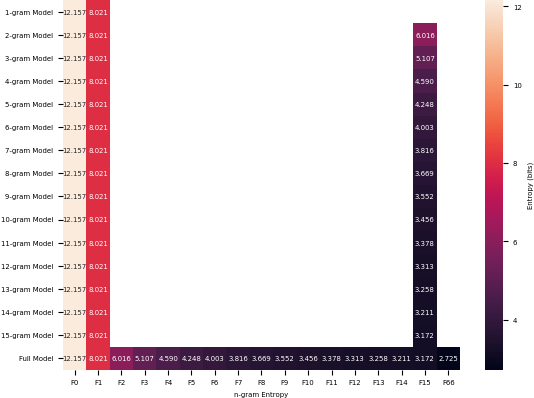

In [ ]:
for n in ngram_models:
    entropy_OI = ngram_models[n]['Entropy Values']
    f1 = entropy_OI['F1']
    for entropy in entropy_OI:
        if entropy in entropy_comp.columns.tolist():
            H = entropy_OI[entropy]
            entropy_comp.loc[n,entropy] = H

            if n != '1-gram Model' and entropy not in ['F0','F1']:
                H_w = f1 - H
                f1_info_gain.loc[n,entropy] = H_w

entropy_comp.fillna(0,inplace=True)
sns.heatmap(entropy_comp, mask=(entropy_comp==0),annot=True,fmt='.3f',annot_kws={'size':5}, cbar_kws={'label':'Entropy (bits)'})
plt.xlabel('n-gram Entropy')
plt.show()

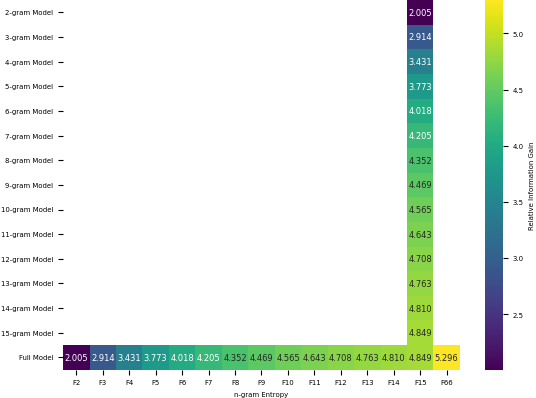

In [ ]:
f1_info_gain.fillna(0,inplace=True)
f1_info_gain.drop(index='1-gram Model', inplace=True)
sns.heatmap(f1_info_gain, mask=(f1_info_gain==0),annot=True,fmt='.3f', cmap='viridis', annot_kws={'size':6},cbar_kws={'label':'Relative Information Gain'})
plt.xlabel('n-gram Entropy')
plt.show()

In [ ]:
# Getting the complete information gain of the full model over the course of the entire n-gram length
x2 = []
entropy_OI = ngram_models['Full Model']['Entropy Values']
f1 = entropy_OI['F1']
for entropy in entropy_OI:

    H = entropy_OI[entropy]
    if n != '1-gram Model' and entropy not in ['F0','F1']:
        H_w = f1 - H
        x2.append(H_w)

In [ ]:
x2[13]

4.849210928126729

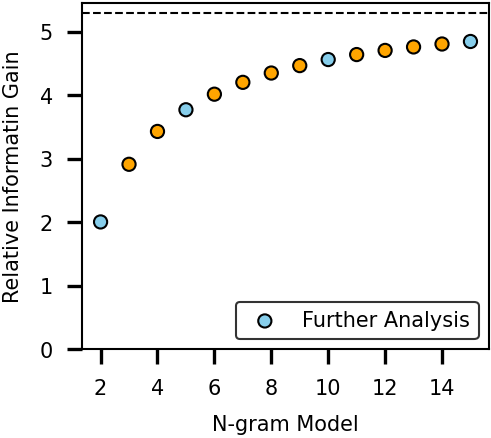

In [ ]:
# Generating the colors to emphasize the models that will be compared
plot_cols =[]
for m in range(2,len(x2)+1):
    if m in mods_OI:
        plot_cols.append('skyblue')
    else:
        plot_cols.append('orange')

plt.figure(figsize=(1.75,1.5),dpi = 300)
plt.scatter(range(2,len(x2)+1),x2[:-1], c=plot_cols,s = 10,edgecolors='k', linewidths=0.5)
plt.axhline(y = x2[-1],color='k', linestyle = 'dashed', linewidth = 0.5)
l = plt.legend(['Further Analysis'], loc = 'lower right',fontsize=5, frameon=True, edgecolor = 'k')
l.get_frame().set_linewidth(0.5)
plt.xlabel('N-gram Model')
a=plt.gca()
a.set_xticks(np.arange(2,16,2))
a.set_yticks(np.linspace(0,5,6))
plt.ylabel('Relative Informatin Gain')
plt.savefig('Figures/Manuscript Figures/Figure 2 Ngram Model Comparison/Focused Information Gain.svg')

In [ ]:
proteome_arch_len = [len(str(x).split('|')) if x != '' else 0 for x in ref_df['Interpro Domain Architecture IDs'].tolist() ]

### Generating the baseline network of the complete proteome.

In [ ]:
G = nx.from_pandas_adjacency(adj_tst)
pos = nx.spring_layout(G, seed = 882)


### For a select number of n-gram models also generating the networks for a simple comparison based on number of connected components and isolates

In [ ]:
Gs_comps = {}
for mod in ngram_model_adjs:
    G_mod = nx.from_pandas_adjacency(ngram_model_adjs[mod]['Adjacency'])
    pos_mod = nx.spring_layout(G_mod)
    Gs_comps[mod] = {'Graph':G_mod, 'Position':pos_mod}

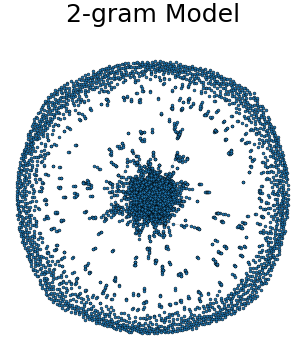

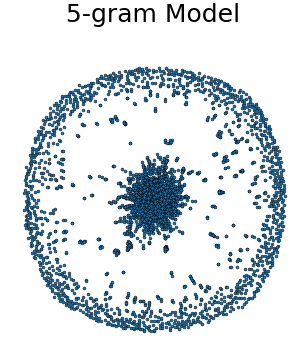

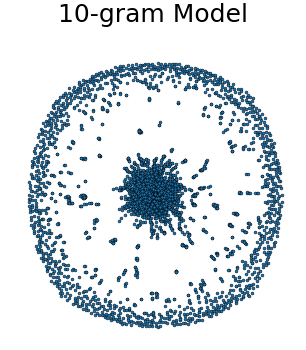

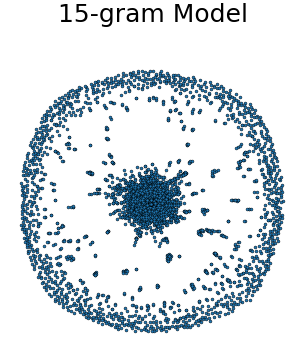

In [ ]:
ngram_net_gross_top = pd.DataFrame(columns=['Isolates', 'Connected Components','Articulation Points'], index=[k for k in Gs_comps.keys()]+['Full Model'])
for G_oi in Gs_comps:
    G_temp = Gs_comps[G_oi]['Graph']
    G_temp.remove_edges_from(nx.selfloop_edges(G_temp))
    pos_temp = Gs_comps[G_oi]['Position']
    plt.figure(figsize=(1,1),dpi = 300, clear=True)
    nx.draw(G_temp, pos=pos_temp, 
        node_size = 0.5, edgecolors= 'k',
        edge_color = '#808080', width = 0.05, linewidths = 0.1)
    plt.title(G_oi)
    ngram_net_gross_top.loc[G_oi,'Isolates'] = nx.number_of_isolates(G_temp)
    ngram_net_gross_top.loc[G_oi,'Connected Components'] = nx.number_connected_components(G_temp)
    ngram_net_gross_top.loc[G_oi,'Articulation Points'] = len(list(nx.articulation_points(G_temp)))
    plt.savefig(f'Figures/Manuscript Figures/Figure 1 Full Proteome Characterization/{G_oi} Network.png')  
    # Getting gross network topology measurements

ngram_net_gross_top.loc['Full Model','Isolates'] = nx.number_of_isolates(G_temp)
ngram_net_gross_top.loc['Full Model','Connected Components'] = nx.number_connected_components(G)
ngram_net_gross_top.loc['Full Model','Articulation Points'] = len(list(nx.articulation_points(G)))

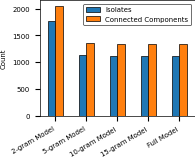

In [ ]:
ngram_net_gross_top.drop('Articulation Points', axis = 1).plot(kind='bar', figsize=(2,1.5),
                                                               edgecolor = 'k', linewidth = 0.5,
                                                               )
l = plt.legend()
l.get_frame().set_linewidth(0.5)
l.get_frame().set_edgecolor('k')
plt.xticks(rotation = 30, ha = 'right')
plt.ylabel('Count')
plt.savefig('Figures/Manuscript Figures/Figure 1 Full Proteome Characterization/Ngram Model Gross Topology Comparison.svg', dpi = 300)


## Continuing characterization of the 3 different n-gram models by comparing how the connected components and isolates have changed across them.

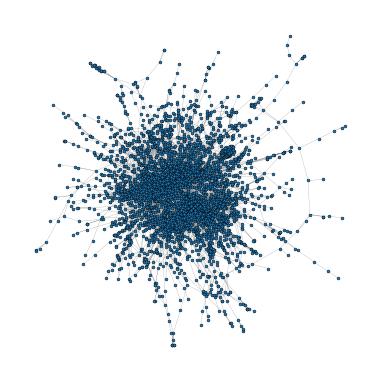

In [ ]:
# Plotting a subgraph of the Full Model to show what the largest connected component looks like
large_cc = max(nx.connected_components(G), key=len)
plt.figure(figsize=(1.25,1.25),dpi = 300, clear=True)
nx.draw(G.subgraph(large_cc), pos=pos, 
        node_size = 0.5, edgecolors= 'k',
        edge_color = '#808080', width = 0.05, linewidths = 0.1)
plt.savefig('Figures/Manuscript Figures/Figure 1 Full Proteome Characterization/Largest Connected Component.svg', dpi = 300)

In [ ]:
mod_freq_dicts = {}
basic_cc_comps = pd.DataFrame(columns=['Isolates','Isolates Generated','Truncated','Split','Preserved'], index=Gs_comps.keys())
for mod in Gs_comps:
    x = len(set(nx.isolates(G)).intersection(nx.isolates(Gs_comps[mod]['Graph'])))
    p = entropyCalc.build_freq_dict_from_adj(ngram_model_adjs[mod]['Adjacency'], ref_df['Interpro Domain Architecture IDs'],ngram_model_adjs[mod]['Removed Ngrams'])
    mod_freq_dicts[mod] = p
    basic_cc_comps.loc[mod, 'Isolates'] = x
    basic_cc_comps.loc[mod, 'Isolates Generated'] = nx.number_of_isolates(Gs_comps[mod]['Graph'])-x
    cc_num = 0 #Completely overlapping ccs
    cn2 = 0 # Truncated ccs
    spl_cnt = 0 # Split ccs
    for cc1 in nx.connected_components(G):
        if len(cc1) == 1: # Skip isolates
            continue
        found_flag = 0
        split_flag = 0


        for cc2 in nx.connected_components(Gs_comps[mod]['Graph']):
            
            # Complete overlap
            if cc1.difference(cc2) == set():
                cc_num += 1
                found_flag = 1

            

            # Partial overlap
            elif len(cc1.difference(cc2)) < len(cc1):
                if found_flag == 1 and split_flag == 0:
                    # If members were previously found then saying it was split
                    spl_cnt += 1
                    cn2 -= 1
                    split_flag = 1
                elif split_flag == 0:    
                    cn2 += 1
                
                found_flag = 1
    
    basic_cc_comps.loc[mod, 'Truncated'] = cn2
    basic_cc_comps.loc[mod, 'Split'] = spl_cnt
    basic_cc_comps.loc[mod, 'Preserved'] = cc_num


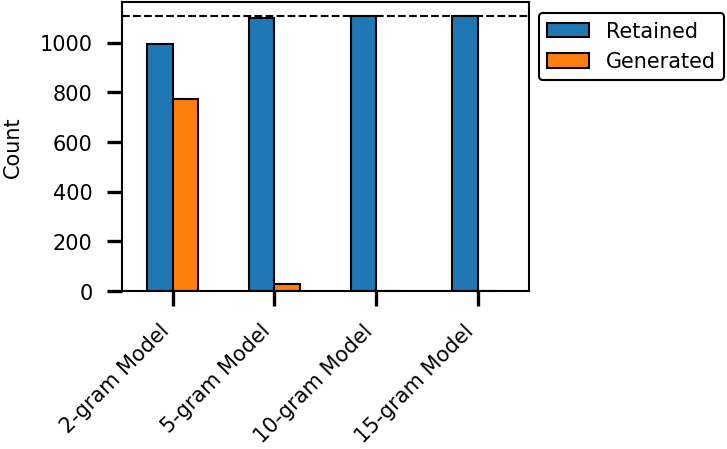

In [ ]:

basic_cc_comps.filter(['Isolates','Isolates Generated'],axis=1).plot.bar(edgecolor ='k',linewidth=0.5)
f =plt.gcf()
f.set_size_inches((1.75,1.25))
f.set_dpi(300)
plt.ylabel('Count')

l = plt.legend(edgecolor='k',framealpha=1, labels=['Retained', 'Generated'],bbox_to_anchor=(1,1))
l.get_frame().set_linewidth(0.5)
l.get_frame().set_edgecolor('k')
plt.xticks(rotation=45,ha='right')
plt.axhline(nx.number_of_isolates(G), color = 'k', linewidth=0.5, linestyle='dashed')

plt.savefig('Figures/Manuscript Figures/Figure 2 Ngram Model Comparison/Isolate Retrieval.svg', transparent=True)

In [74]:
basic_cc_comps

,Isolates,Isolates Generated,Truncated,Split,Preserved
2-gram Model,994,771,89,16,130
5-gram Model,1100,28,8,2,229
10-gram Model,1105,2,3,0,236
15-gram Model,1106,1,2,0,237


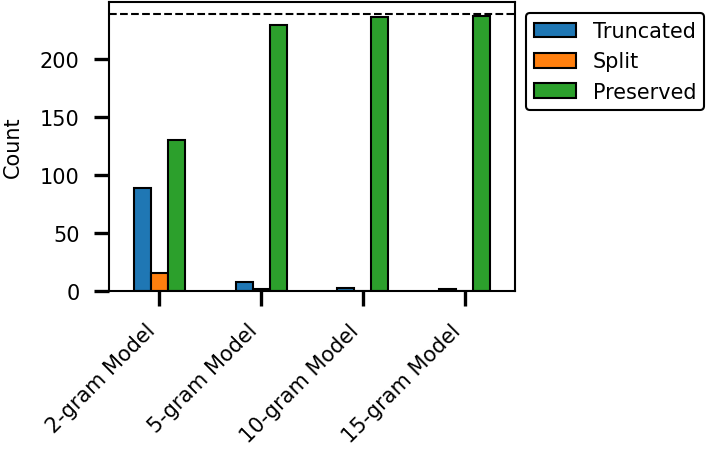

In [73]:

basic_cc_comps.drop(['Isolates','Isolates Generated'],axis=1).plot.bar(edgecolor ='k',linewidth=0.5,stacked=False)
f =plt.gcf()
f.set_size_inches((1.75,1.25))
f.set_dpi(300)
plt.ylabel('Count')

l = plt.legend(edgecolor='k',framealpha=1, bbox_to_anchor=(1,1))
l.get_frame().set_linewidth(0.5)
l.get_frame().set_edgecolor('k')
plt.xticks(rotation=45,ha='right')
plt.axhline(nx.number_connected_components(G)-nx.number_of_isolates(G), color = 'k', linewidth=0.5, linestyle='dashed')

plt.savefig('Figures/Manuscript Figures/Figure 2 Ngram Model Comparison/Non-Isolate Retrieval.svg', transparent=True)

In [75]:
# For each of the ngram models now checking how the relative entorpy changes
q = entropyCalc.build_freq_dict_from_adj(adj_tst,ref_df['Interpro Domain Architecture IDs'],temp_rm)

In [76]:
set(mod_freq_dicts['5-gram Model'].keys()).difference(q.keys())

set()

In [77]:
kl_df = pd.DataFrame(index=mod_freq_dicts.keys(),columns=['Relative Entropy'])
for mod,p in mod_freq_dicts.items():
    
    kl = entropyCalc.relativeEntropy(p,q)
    kl_df.loc[mod, 'Relative Entropy'] = kl

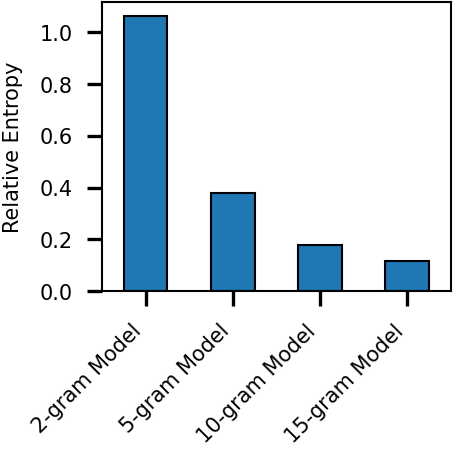

In [78]:
kl_df.plot.bar(edgecolor = 'k',linewidth = 0.5)
f = plt.gcf()
f.set_size_inches((1.5,1.25))
f.set_dpi(300)
plt.ylabel('Relative Entropy')
plt.xticks(rotation = 45,ha='right')
plt.legend().remove()
plt.savefig('Figures/Manuscript Figures/Figure 2 Ngram Model Comparison/Relative Entropy.svg', transparent=True)